In [37]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Reading the data consistently
df = pd.read_csv('Data/a4/LC_Data_Q1_2017.csv', sep=',', header=0, low_memory=False)

In [39]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32,451.73,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,103922044,NaN,20000.0,20000.0,20000.0,36 months,10.49,649.96,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,103952006,NaN,14000.0,14000.0,14000.0,60 months,12.74,316.69,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,103347407,NaN,9900.0,9900.0,9900.0,36 months,5.32,298.14,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,104190249,NaN,3600.0,3600.0,3600.0,36 months,7.49,111.97,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning and Preparation

## Data Source
The dataset used is Lending Club loan data from Q1 2017. Lending Club is a peer-to-peer lending platform, and this dataset contains information on loans, including whether they defaulted.

## Initial Data Exploration

In [40]:
# Prove of consistent reading
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
# Print columns with missing values (>20%) and their indices
missing_cols = missing_data[missing_data['Percentage'] > 20].sort_values('Percentage', ascending=False)
print("\nColumns with missing values (>20%):")
for idx, (col, row) in enumerate(missing_cols.iterrows()):
    print(f"{idx}: {col} - {row['Percentage']:.2f}% missing")

# Check target variable (loan_status) distribution
print("\nLoan status distribution:")
print(df['loan_status'].value_counts())

Dataset shape: (96779, 151)

Data types:
float64    114
object      36
int64        1
Name: count, dtype: int64

Columns with missing values (>20%):
0: member_id - 100.00% missing
1: desc - 100.00% missing
2: sec_app_mths_since_last_major_derog - 99.63% missing
3: orig_projected_additional_accrued_interest - 99.27% missing
4: hardship_amount - 99.09% missing
5: hardship_type - 99.09% missing
6: hardship_reason - 99.09% missing
7: hardship_status - 99.09% missing
8: deferral_term - 99.09% missing
9: hardship_start_date - 99.09% missing
10: hardship_end_date - 99.09% missing
11: payment_plan_start_date - 99.09% missing
12: hardship_length - 99.09% missing
13: hardship_dpd - 99.09% missing
14: hardship_loan_status - 99.09% missing
15: hardship_payoff_balance_amount - 99.09% missing
16: hardship_last_payment_amount - 99.09% missing
17: sec_app_revol_util - 98.95% missing
18: sec_app_num_rev_accts - 98.94% missing
19: sec_app_chargeoff_within_12_mths - 98.94% missing
20: sec_app_collections

In [41]:
# analysis into deleting that will be deleted
# provide me some values that are not missing in the columns hardship_reason, hardship_last_payment_amount, sec_app_mort_acc
print("\nUnique values in hardship_reason:")
print(df['hardship_reason'].unique())
# check for the rows that are not missing in hardship_reason what their loan_status is
print("\nLoan status for non-missing hardship_reason:")
print(df[df['hardship_reason'].notnull()]['loan_status'].value_counts())


print("\nUnique values in sec_app_mort_acc:")
print(df['sec_app_mort_acc'].unique())
# check for the rows that are not missing in sec_app_mort_acc what their loan_status is
print("\nLoan status for non-missing sec_app_mort_acc:")
print(df[df['sec_app_mort_acc'].notnull()]['loan_status'].value_counts())

# give me the unique values in settlement_status
print("\nUnique values in settlement_status:")
print(df['settlement_status'].unique())
# check for the rows that are not missing in settlement_status what their loan_status is
print("\nLoan status for non-missing settlement_status:")
print(df[df['settlement_status'].notnull()]['loan_status'].value_counts())



Unique values in hardship_reason:
[nan 'UNEMPLOYMENT' 'NATURAL_DISASTER' 'MEDICAL' 'INCOME_CURTAILMENT'
 'EXCESSIVE_OBLIGATIONS' 'REDUCED_HOURS' 'FAMILY_DEATH' 'DIVORCE'
 'DISABILITY']

Loan status for non-missing hardship_reason:
loan_status
Current               298
Charged Off           292
Late (31-120 days)    136
Fully Paid            100
In Grace Period        26
Late (16-30 days)      25
Name: count, dtype: int64

Unique values in sec_app_mort_acc:
[nan  2.  0.  5.  4.  1.  3.  6.  9.  7.  8. 15.]

Loan status for non-missing sec_app_mort_acc:
loan_status
Current               576
Fully Paid            310
Charged Off           106
Late (31-120 days)     22
In Grace Period        10
Late (16-30 days)       1
Name: count, dtype: int64

Unique values in settlement_status:
[nan 'ACTIVE' 'COMPLETE' 'BROKEN']

Loan status for non-missing settlement_status:
loan_status
Charged Off           1470
Late (31-120 days)     121
Current                  3
In Grace Period          2
Default

## WARNING: dropping loans from settlement group  
decreases accuracy but good to test

In [42]:
# # drop all the rows that have non-missing values for settlement_status
# df = df[df['settlement_status'].isnull()]

## Handling Missing Values

We'll use the following strategies for handling missing values:
- Drop columns with more than 50% missing values  

Missing values for mth_since_last_delinq were filled with zero.  
For the rest it is assumed that filling up is fine. 

For the missing values in the remaining columns
- For numeric columns: Replace with median
- For categorical columns: Replace with most frequent value 

In [43]:
# Function to identify columns to keep or drop based on missing percentage
def identify_columns_to_process(df, threshold=0.5):
    cols_to_drop = []
    
    for col in df.columns:
        missing_pct = df[col].isnull().mean()
        if missing_pct > threshold:
            cols_to_drop.append(col)
    
    return cols_to_drop

# Identify columns to drop
cols_to_drop = identify_columns_to_process(df, 0.5)
print(f"Dropping {len(cols_to_drop)} columns with >50% missing values")
df_cleaned = df.drop(columns=cols_to_drop)

# check on the distribution of missing values of the remaining columns
missing_values_remaining = df_cleaned.isnull().sum()
missing_percent_remaining = (missing_values_remaining / len(df_cleaned)) * 100
missing_data_remaining = pd.DataFrame({
    'Missing Values': missing_values_remaining,
    'Percentage': missing_percent_remaining
})
print("\nRemaining columns with missing values:")
print(missing_data_remaining[missing_data_remaining['Percentage'] > 0].sort_values('Percentage', ascending=False))

# # drop the column next_pymnt_d
# df_cleaned.drop(columns=['next_pymnt_d'], inplace=True)

# set the missing values in the column mth_since_last_delq to 0
df_cleaned['mths_since_last_delinq'].fillna(0, inplace=True)

# Separate numeric and categorical columns
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove 'is_default' from features if it's in the lists
if 'is_default' in numeric_features:
    numeric_features.remove('is_default')
    print("'is_default' removed from numeric features")

Dropping 42 columns with >50% missing values

Remaining columns with missing values:
                        Missing Values  Percentage
next_pymnt_d                     46871   48.430961
mths_since_last_delinq           46293   47.833724
il_util                          12998   13.430600
mths_since_recent_inq            11314   11.690553
emp_title                         6892    7.121380
emp_length                        6792    7.018051
num_tl_120dpd_2m                  4706    4.862625
mo_sin_old_il_acct                2596    2.682400
mths_since_rcnt_il                2596    2.682400
bc_util                           1028    1.062214
percent_bc_gt_75                   987    1.019849
bc_open_to_buy                     985    1.017783
mths_since_recent_bc               945    0.976452
last_pymnt_d                       110    0.113661
revol_util                          51    0.052697
dti                                 33    0.034098
all_util                             3    0.0031

## WARNING --> only execute when filling up missing values

In [44]:
# # Impute missing values
# for col in numeric_features:
#     if df_cleaned[col].isnull().sum() > 0:
#         median_value = df_cleaned[col].median()
#         df_cleaned[col].fillna(median_value, inplace=True)

# for col in categorical_features:
#     if df_cleaned[col].isnull().sum() > 0:
#         most_frequent = df_cleaned[col].mode()[0]
#         df_cleaned[col].fillna(most_frequent, inplace=True)

# # Check remaining missing values
# remaining_nulls = df_cleaned.isnull().sum().sum()
# print(f"Remaining null values: {remaining_nulls}")

## Prepare Default Variable

For our target variable, we'll transform 'loan_status' into a binary default indicator where:
- 1 (Default): Loans that are "Charged Off" or have a similar negative status
- 0 (No Default): Loans that are "Current" or "Fully Paid"

Default rate:
is_default
0    87.099474
1    12.900526
Name: proportion, dtype: float64


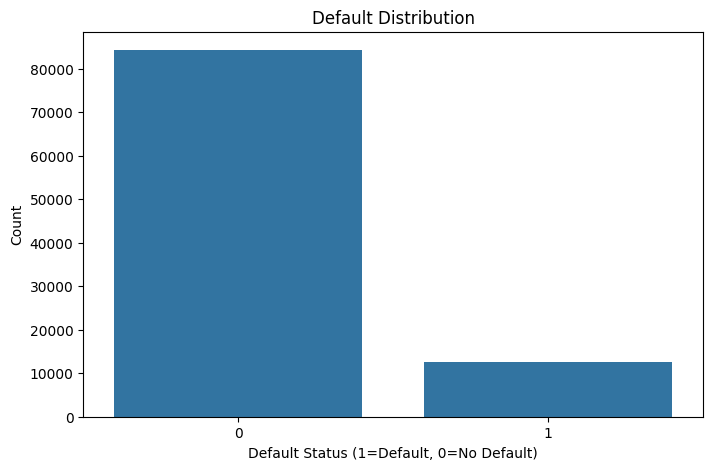

In [45]:
# Create a binary default indicator
default_statuses = ["Charged Off", "Default", "Late (31-120 days)", "Late (16-30 days)"]
df_cleaned['is_default'] = df_cleaned['loan_status'].isin(default_statuses).astype(int)

# Check the distribution of the newly created default variable
print("Default rate:")
print(df_cleaned['is_default'].value_counts(normalize=True) * 100)

# Visualize default distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='is_default', data=df_cleaned)
plt.title('Default Distribution')
plt.xlabel('Default Status (1=Default, 0=No Default)')
plt.ylabel('Count')
plt.show()

## Feature Selection and Transformation

Let's prepare features for our model by:
1. Removing unnecessary ID columns
2. Converting categorical features
3. Creating transformations of numeric variables

In [105]:
# Remove ID columns and other non-predictive features
id_columns = ['id', 'member_id', 'url', 'desc']
df_features = df_cleaned.drop(columns=[col for col in id_columns if col in df_cleaned.columns])

# Handle interest rate (convert from string to numeric)
if 'int_rate' in df_features.columns and df_features['int_rate'].dtype == 'object':
    df_features['int_rate'] = df_features['int_rate'].str.rstrip('%').astype('float')

# Convert term to numeric (months)
if 'term' in df_features.columns:
    df_features['term'] = df_features['term'].str.strip().str.split(' ').str[0].astype(int)

# Process employment length
if 'emp_length' in df_features.columns:
    emp_length_map = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
    df_features['emp_length'] = df_features['emp_length'].map(lambda x: emp_length_map.get(x, np.nan))
    df_features['emp_length'].fillna(df_features['emp_length'].median(), inplace=True)

# Create transformations of numeric variables
numeric_cols = df_features.select_dtypes(include=['int64', 'float64']).columns
transformed_features = []

for col in numeric_cols:
    if col not in ['is_default']:
        # Check skewness to determine which transformation to apply
        if df_features[col].skew() > 1 and (df_features[col] > 0).all():
            # Log transform for highly skewed numeric columns
            df_features[f'{col}_log'] = np.log1p(df_features[col])
            transformed_features.append(col)
        elif (df_features[col] >= 0).all():
            # Square root transform for less skewed columns
            df_features[f'{col}_sqrt'] = np.sqrt(df_features[col])
            transformed_features.append(col)

# Remove original features that have been transformed
df_features = df_features.drop(columns=transformed_features)

# Ratios that might be informative
if all(col in df_features.columns for col in ['annual_inc', 'loan_amnt']):
    df_features['debt_to_income'] = df_features['loan_amnt'] / df_features['annual_inc']

if all(col in df_features.columns for col in ['revol_bal', 'annual_inc']):
    df_features['revol_util_income'] = df_features['revol_bal'] / df_features['annual_inc']

# apply one-hot encoding to categorical variables with less than 10 unique values
for col in categorical_features:
    if col in df_features.columns and df_features[col].nunique() < 10:
        dummies = pd.get_dummies(df_features[col], prefix=col, drop_first=True)
        df_features = pd.concat([df_features, dummies], axis=1)
        df_features.drop(columns=[col], inplace=True)        

# Check the shape of the dataset after feature engineering
print(f"Dataset shape after feature engineering: {df_features.shape}")

Dataset shape after feature engineering: (96779, 124)


## Handling Class Imbalance

Improving the class imbalance by:  
- checking the length of both classes
- downsample the majority class so that 3/1 ratio

In [106]:
# Check class imbalance
# 'is_default' is not present in df_features, but it exists in the original df and in df_cleaned.
# To check class imbalance, use df_cleaned['is_default'] instead:
default_ratio = df_features['is_default'].mean()
print(f"Default rate: {default_ratio:.2%}")

# Decide on sampling approach based on imbalance
from sklearn.utils import resample

# Let's implement a simple downsampling approach
# 1. Downsampling the majority class
df_majority = df_features[df_features['is_default'] == 0]
df_minority = df_features[df_features['is_default'] == 1]

print(f"Number of non-default loans: {len(df_majority)}")
print(f"Number of default loans: {len(df_minority)}")


Default rate: 12.90%
Number of non-default loans: 84294
Number of default loans: 12485


## WARNING --> only execute when deleting all rows with missing values

In [107]:
# Check on the majority class the amount of missing values
missing_values_majority = df_majority.isnull().sum()
missing_percent_majority = (missing_values_majority / len(df_majority)) * 100
missing_data_majority = pd.DataFrame({
    'Missing Values': missing_values_majority,
    'Percentage': missing_percent_majority
})
print("\nMissing values in majority class:")
print(missing_data_majority[missing_data_majority['Percentage'] > 0].sort_values('Percentage', ascending=False))

# delete all the rows with missing values in the majority class
df_majority = df_majority.dropna()
# Check the shape of the dataset after dropping missing values
print(f"Majority class shape after dropping missing values: {df_majority.shape}")

# check on the majority class the amount of missing values
missing_values_majority = df_majority.isnull().sum()

# Check the minority class the amount of missing values
missing_values_minority = df_minority.isnull().sum()
missing_percent_minority = (missing_values_minority / len(df_minority)) * 100
missing_data_minority = pd.DataFrame({
    'Missing Values': missing_values_minority,
    'Percentage': missing_percent_minority
})
print("\nMissing values in minority class:")
print(missing_data_minority[missing_data_minority['Percentage'] > 0].sort_values('Percentage', ascending=False))

# delete all the rows with missing values in the minority class
df_minority = df_minority.dropna()
# Check the shape of the dataset after dropping missing values
print(f"Minority class shape after dropping missing values: {df_minority.shape}")



Missing values in majority class:
                       Missing Values  Percentage
il_util                         11370   13.488505
mths_since_recent_inq           10325   12.248796
emp_title                        5642    6.693240
num_tl_120dpd_2m                 3750    4.448715
mths_since_rcnt_il               2219    2.632453
mo_sin_old_il_acct               2219    2.632453
bc_util                           893    1.059387
percent_bc_gt_75                  863    1.023798
bc_open_to_buy                    861    1.021425
mths_since_recent_bc              823    0.976345
revol_util                         45    0.053385
dti                                29    0.034403
all_util                            3    0.003559
zip_code                            1    0.001186
last_credit_pull_d                  1    0.001186
Majority class shape after dropping missing values: (57274, 124)

Missing values in minority class:
                       Missing Values  Percentage
il_util        

In [108]:
# Determine if downsampling is needed
if len(df_minority) / len(df_features) < 0.2:  # If minority class is less than 20%
    print("Implementing downsampling...")
    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                    replace=False,
                                    n_samples=len(df_minority) * 3,  # 3:1 ratio
                                    random_state=42)
    
    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    print(f"Shape after downsampling: {df_downsampled.shape}")
    print(f"New default rate: {df_downsampled['is_default'].mean():.2%}")
else:
    print("Class imbalance is not severe, using original dataset")
    df_downsampled = df_features.copy()

# Store the cleaned dataset for future use
df_downsampled.to_csv('cleaned_loan_data.csv', index=False)
print("Cleaned dataset saved to 'cleaned_loan_data.csv'")

Implementing downsampling...
Shape after downsampling: (32932, 124)
New default rate: 25.00%
Cleaned dataset saved to 'cleaned_loan_data.csv'


## Analyzing Feature Correlations

We'll analyze the correlations between features to identify potential multicollinearity and important predictors.

<Figure size 1200x1000 with 0 Axes>

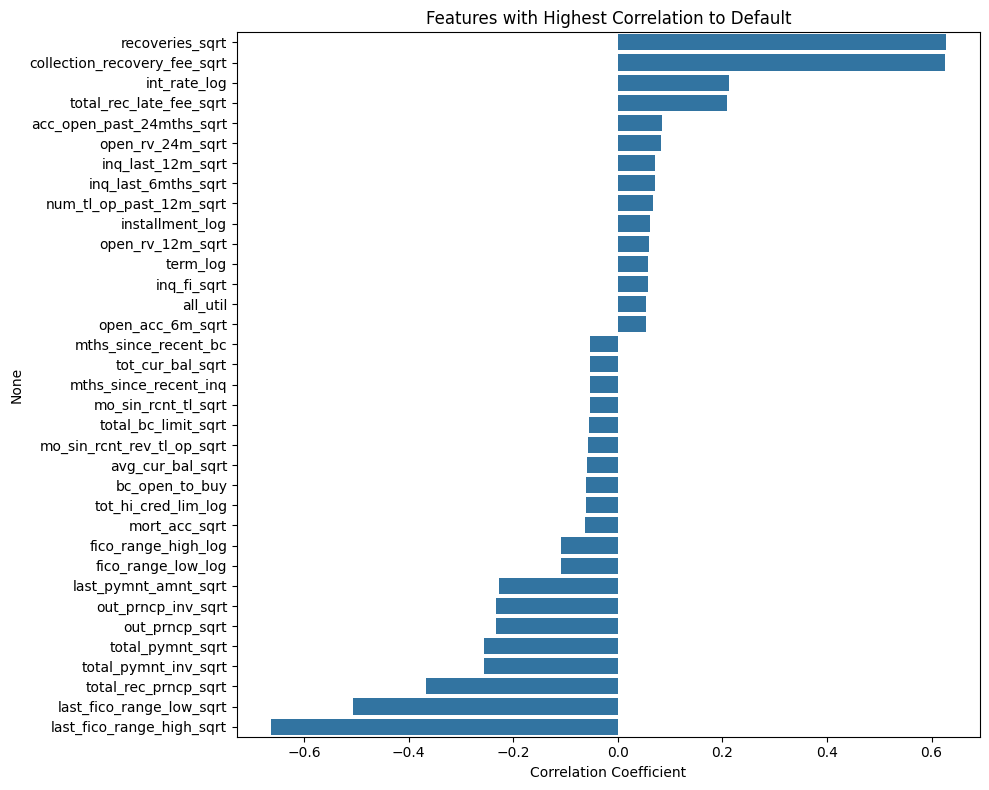

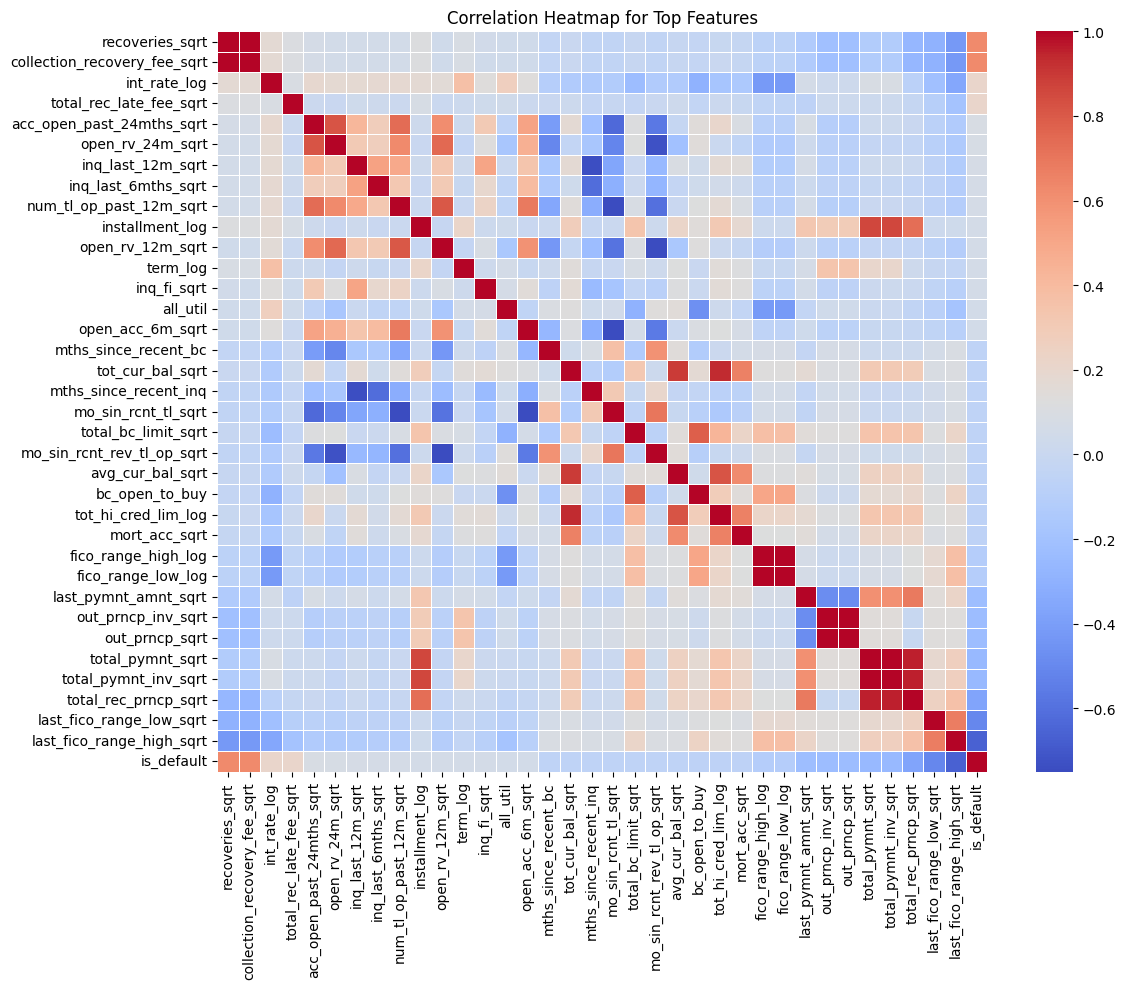

In [109]:
# Create a correlation matrix for numeric features
numeric_df = df_features.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap for the default variable
plt.figure(figsize=(12, 10))
default_corr = correlation_matrix['is_default'].sort_values(ascending=False)
top_correlations = default_corr[abs(default_corr) > 0.05]
top_correlations = top_correlations.drop('is_default')  # Remove self-correlation

plt.figure(figsize=(10, 8))
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Features with Highest Correlation to Default')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Plot correlation heatmap for top correlated features
plt.figure(figsize=(12, 10))
top_features = list(top_correlations.index) + ['is_default']
sns.heatmap(correlation_matrix.loc[top_features, top_features], 
            annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Top Features')
plt.tight_layout()
plt.show()

In [110]:
## Store the cleaned/transformed/resampled dataset
df_downsampled.to_csv('cleaned_transformed_resampled_loan_data.csv', index=False)

# 3. Analysis with Logistic Regression

Now we'll use logistic regression to model the default probability and analyze the results.

In [207]:

# Prepare the data for modeling
# Sort the features by absolute correlation with the target variable
sorted_features = default_corr.abs().sort_values(ascending=False)
# print("\nTop features sorted by absolute correlation with default:")
# for feature, corr in sorted_features.items():
#     print(f"{feature}: {default_corr[feature]:.6f}")


# Select final features for modeling
# We'll exclude highly correlated features and focus on the most predictive ones
selected_features = list(sorted_features.index[1:21])  # Top 15 features by correlation
print(f"Selected features: {selected_features}")

# Prepare X and y
X = df_downsampled[selected_features]
y = df_downsampled['is_default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)
y_pred_prob_test = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance on test set
print("\nLogistic Regression Model Performance on Test Set:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate accuracy and precision
from sklearn.metrics import accuracy_score, precision_score, f1_score
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("\nIn-sample performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nOut-of-sample performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"F1 Score: {test_f1:.4f}")




Selected features: ['last_fico_range_high_sqrt', 'recoveries_sqrt', 'collection_recovery_fee_sqrt', 'last_fico_range_low_sqrt', 'total_rec_prncp_sqrt', 'total_pymnt_inv_sqrt', 'total_pymnt_sqrt', 'out_prncp_sqrt', 'out_prncp_inv_sqrt', 'last_pymnt_amnt_sqrt', 'int_rate_log', 'total_rec_late_fee_sqrt', 'fico_range_low_log', 'fico_range_high_log', 'acc_open_past_24mths_sqrt', 'open_rv_24m_sqrt', 'inq_last_12m_sqrt', 'inq_last_6mths_sqrt', 'num_tl_op_past_12m_sqrt', 'mort_acc_sqrt']
Training set shape: (26345, 20)
Testing set shape: (6587, 20)

Logistic Regression Model Performance on Test Set:
[[4854   86]
 [ 178 1469]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4940
           1       0.94      0.89      0.92      1647

    accuracy                           0.96      6587
   macro avg       0.95      0.94      0.95      6587
weighted avg       0.96      0.96      0.96      6587


In-sample performance:

## Analyzing Feature Importance and Odds Ratios

Let's analyze the most important predictors and their odds ratios.

Feature Importance (Logistic Regression):
                         Feature  Coefficient  Odds_Ratio
4           total_rec_prncp_sqrt    -5.127561    0.005931
2   collection_recovery_fee_sqrt     3.052120   21.160154
1                recoveries_sqrt     3.024388   20.581396
6               total_pymnt_sqrt     2.448160   11.567040
5           total_pymnt_inv_sqrt     2.394417   10.961801
0      last_fico_range_high_sqrt    -2.285547    0.101718
9           last_pymnt_amnt_sqrt    -1.647227    0.192583
8             out_prncp_inv_sqrt    -0.692627    0.500260
7                 out_prncp_sqrt    -0.667130    0.513179
10                  int_rate_log    -0.513300    0.598517
11       total_rec_late_fee_sqrt     0.385812    1.470808
14     acc_open_past_24mths_sqrt     0.150603    1.162535
12            fico_range_low_log     0.123779    1.131766
13           fico_range_high_log     0.122575    1.130404
19                 mort_acc_sqrt     0.087197    1.091111
3       last_fico_range_low_sq

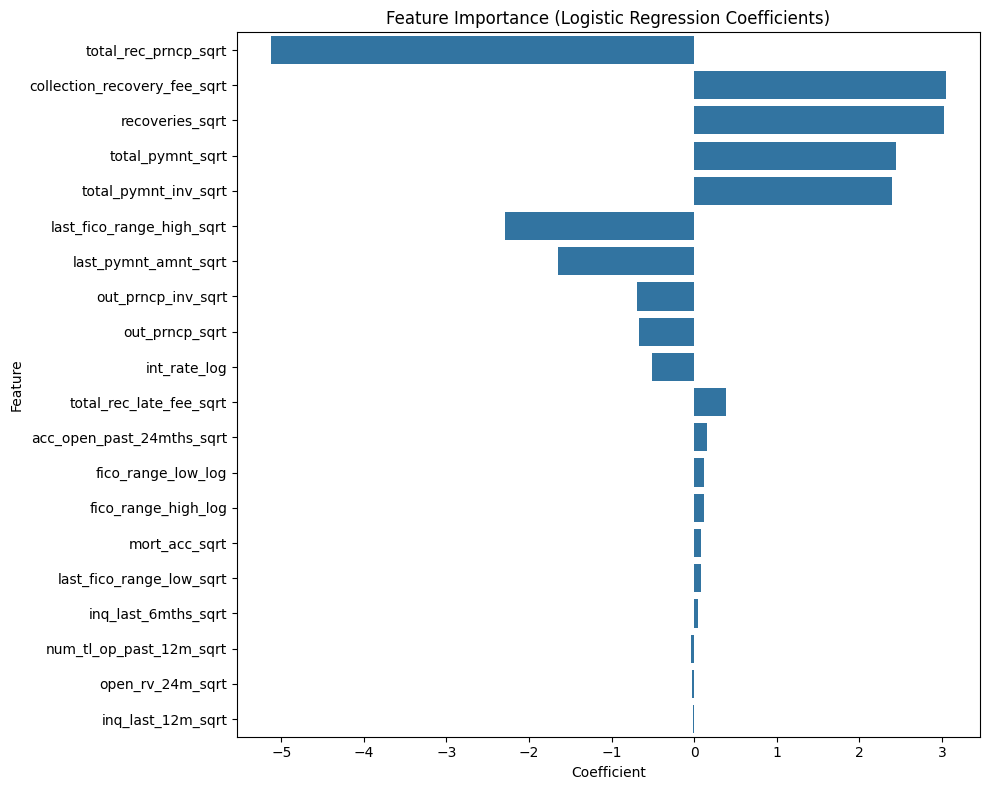

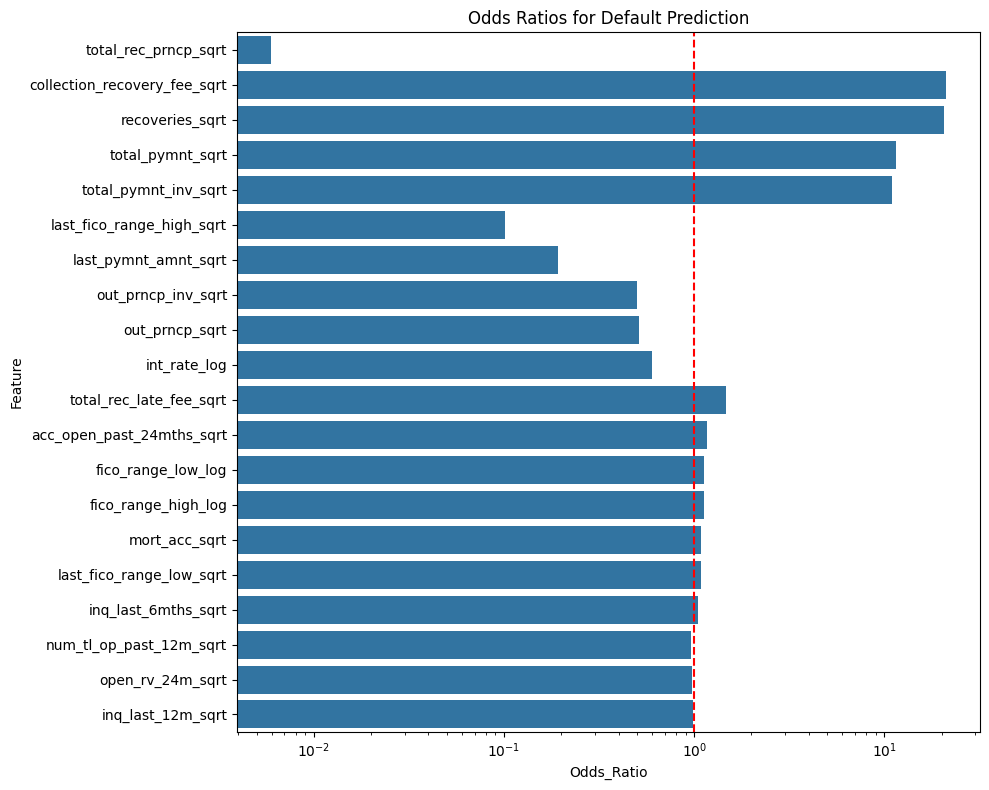

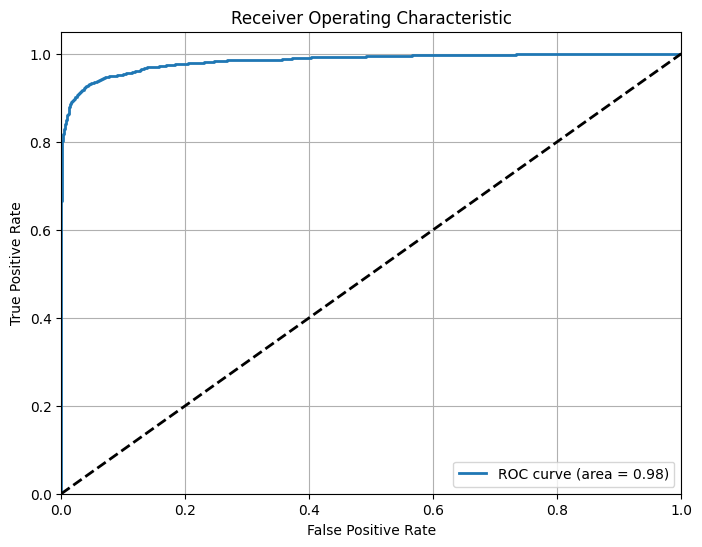

In [208]:
# Get coefficients and odds ratios
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logreg.coef_[0],
    'Odds_Ratio': np.exp(logreg.coef_[0])
})

# Sort by absolute coefficient value
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Importance (Logistic Regression):")
print(coef_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()

# Plot odds ratios
plt.figure(figsize=(10, 8))
sns.barplot(x='Odds_Ratio', y='Feature', data=coef_df)
plt.title('Odds Ratios for Default Prediction')
plt.xscale('log')  # Log scale for better visualization
plt.axvline(x=1, color='red', linestyle='--')  # Reference line at odds ratio = 1
plt.tight_layout()
plt.show()

# ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



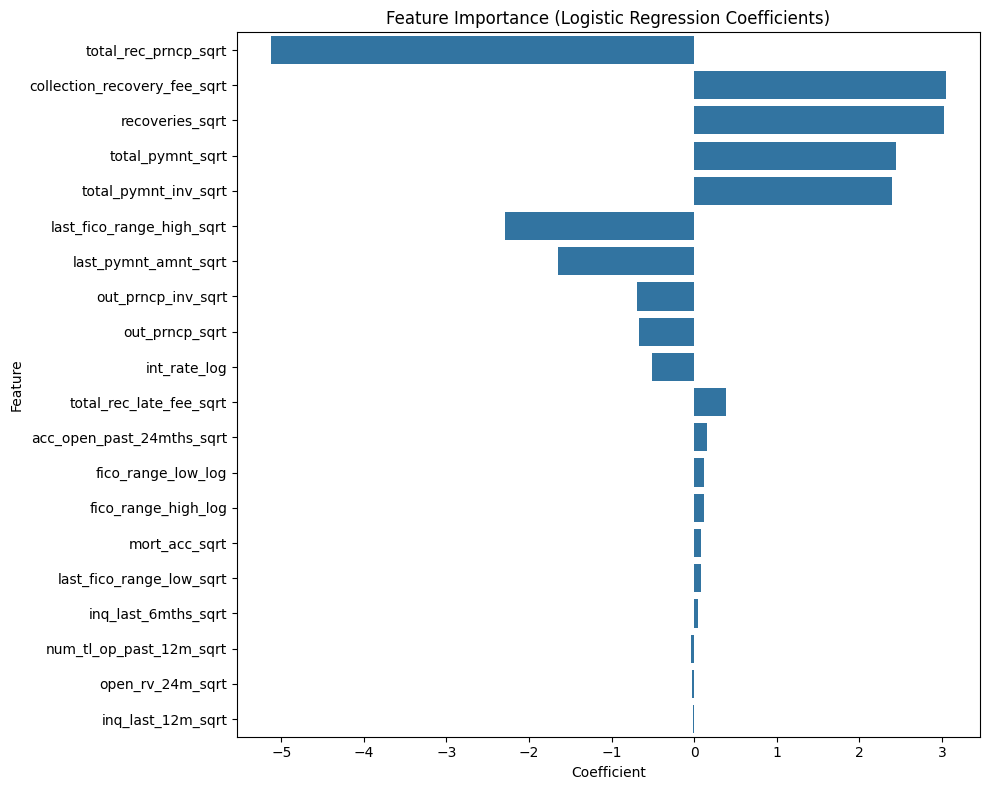

In [218]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()


# 4. Machine Learning Model (Extra)

Now let's implement a Random Forest model to see if we can improve prediction performance.

Fitting 5 folds for each of 48 candidates, totalling 240 fits



Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9368468514773489

Random Forest In-sample performance:
Accuracy: 0.9947
Precision: 0.9916
F1 Score: 0.9894

Random Forest Model Performance on Test Set:
[[4882   58]
 [ 144 1503]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4940
           1       0.96      0.91      0.94      1647

    accuracy                           0.97      6587
   macro avg       0.97      0.95      0.96      6587
weighted avg       0.97      0.97      0.97      6587


Random Forest Out-of-sample performance:
Accuracy: 0.9693
Precision: 0.9628
F1 Score: 0.9370

Feature Importance (Random Forest):
                         Feature  Importance
0      last_fico_range_high_sqrt    0.275996
3       last_fico_range_low_sqrt    0.230136
9           last_pymnt_amnt_sqrt    0.087250

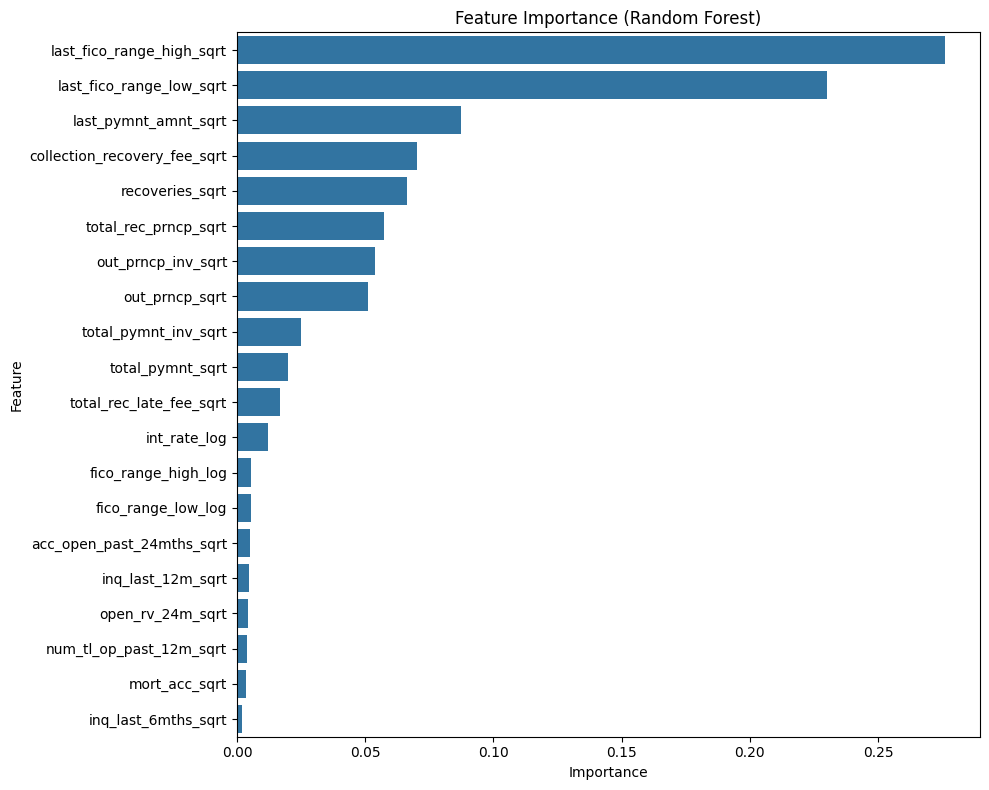

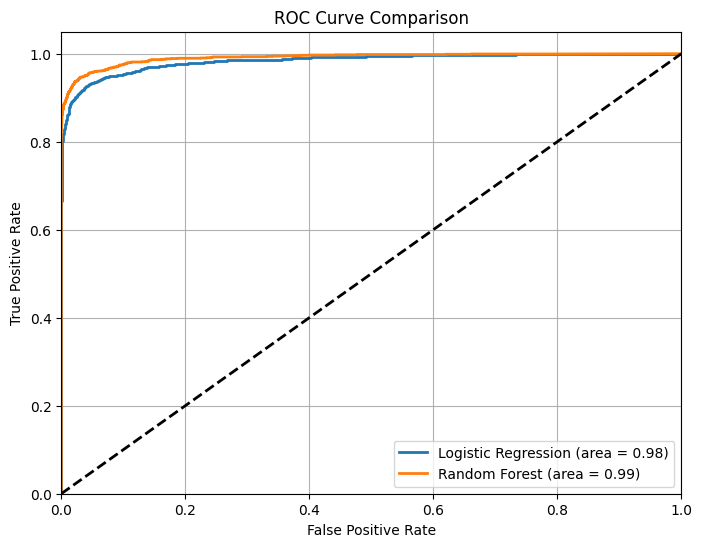

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Create RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use best model for predictions
rf_model = grid_search.best_estimator_

# Make predictions
rf_pred_train = rf_model.predict(X_train_scaled)
rf_pred_test = rf_model.predict(X_test_scaled)
rf_pred_prob_test = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate in-sample performance metrics
rf_train_accuracy = accuracy_score(y_train, rf_pred_train)
rf_train_precision = precision_score(y_train, rf_pred_train)
rf_train_f1 = f1_score(y_train, rf_pred_train)

print("\nRandom Forest In-sample performance:")
print(f"Accuracy: {rf_train_accuracy:.4f}")
print(f"Precision: {rf_train_precision:.4f}")
print(f"F1 Score: {rf_train_f1:.4f}")

# Evaluate model performance on test set
print("\nRandom Forest Model Performance on Test Set:")
print(confusion_matrix(y_test, rf_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred_test))

# Calculate metrics
rf_test_accuracy = accuracy_score(y_test, rf_pred_test)
rf_test_precision = precision_score(y_test, rf_pred_test)
rf_test_f1 = f1_score(y_test, rf_pred_test)

print("\nRandom Forest Out-of-sample performance:")
print(f"Accuracy: {rf_test_accuracy:.4f}")
print(f"Precision: {rf_test_precision:.4f}")
print(f"F1 Score: {rf_test_f1:.4f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# Compare ROC curves of both models
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (area = {roc_auc_lr:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.9439538466839229

Gradient Boosting In-sample performance:
Accuracy: 0.9835
Precision: 0.9895
F1 Score: 0.9661

Gradient Boosting Model Performance on Test Set:
[[4890   50]
 [ 139 1508]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4940
           1       0.97      0.92      0.94      1647

    accuracy                           0.97      6587
   macro avg       0.97      0.95      0.96      6587
weighted avg       0.97      0.97      0.97      6587


Gradient Boosting Out-of-sample performance:
Accuracy: 0.9713
Precision: 0.9679
F1 Score: 0.9410

Feature Importance (Gradient Boosting):
                         Feature  Importance
0      last_fico_range_high_sqrt    0.444602
3       last_

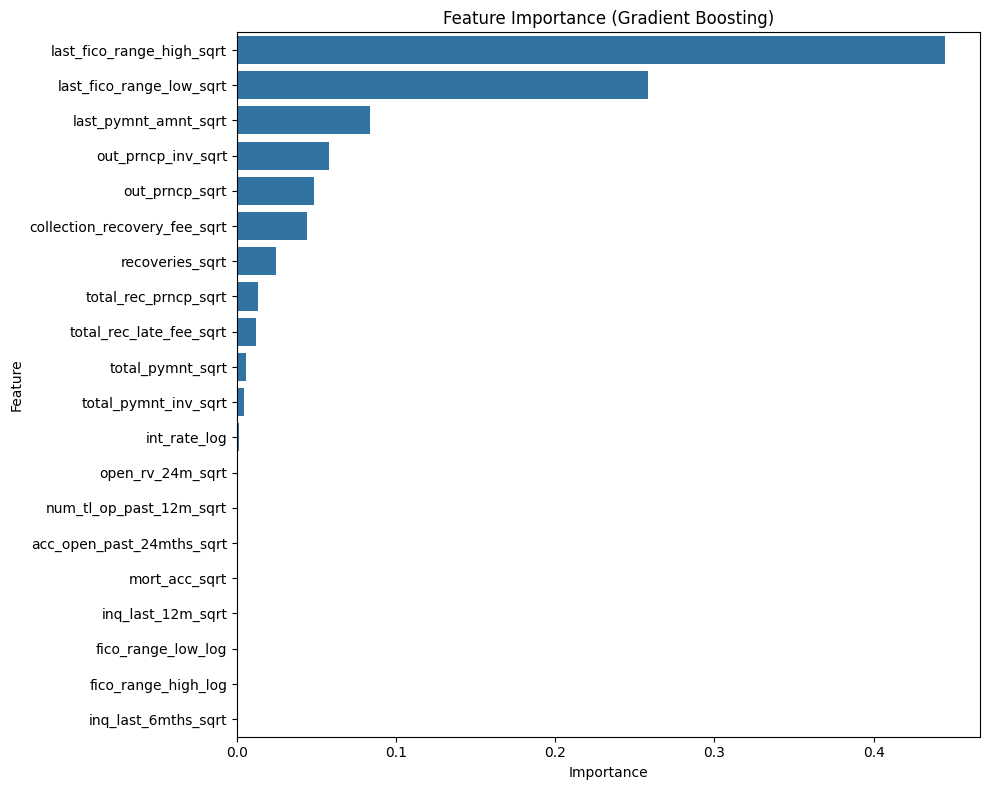

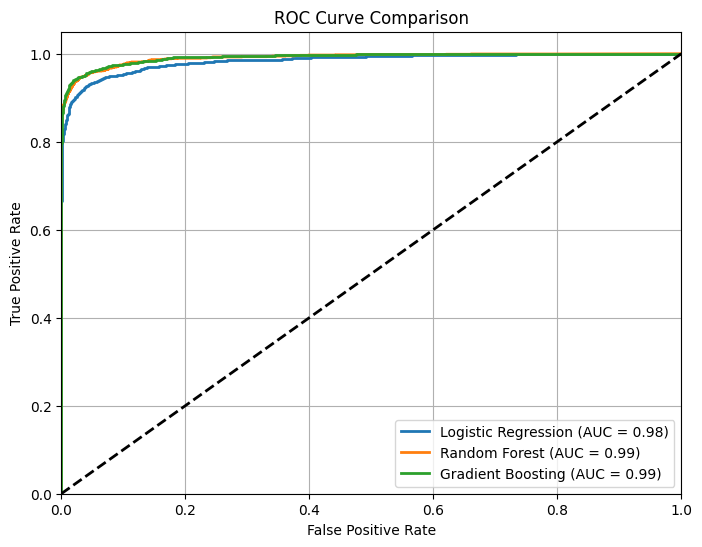

In [210]:
from sklearn.ensemble import GradientBoostingClassifier
# Define parameter grid for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Create GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_gbm = GridSearchCV(
    estimator=gbm_model,
    param_grid=param_grid_gbm,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search_gbm.fit(X_train_scaled, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search_gbm.best_params_)
print("Best cross-validation score:", grid_search_gbm.best_score_)

# Use best model for predictions
gbm_model = grid_search_gbm.best_estimator_

# Make predictions
gbm_pred_train = gbm_model.predict(X_train_scaled)
gbm_pred_test = gbm_model.predict(X_test_scaled)
gbm_pred_prob_test = gbm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate in-sample performance metrics
gbm_train_accuracy = accuracy_score(y_train, gbm_pred_train)
gbm_train_precision = precision_score(y_train, gbm_pred_train)
gbm_train_f1 = f1_score(y_train, gbm_pred_train)

print("\nGradient Boosting In-sample performance:")
print(f"Accuracy: {gbm_train_accuracy:.4f}")
print(f"Precision: {gbm_train_precision:.4f}")
print(f"F1 Score: {gbm_train_f1:.4f}")

# Evaluate model performance on test set
print("\nGradient Boosting Model Performance on Test Set:")
print(confusion_matrix(y_test, gbm_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, gbm_pred_test))

# Calculate metrics
gbm_test_accuracy = accuracy_score(y_test, gbm_pred_test)
gbm_test_precision = precision_score(y_test, gbm_pred_test)
gbm_test_f1 = f1_score(y_test, gbm_pred_test)

print("\nGradient Boosting Out-of-sample performance:")
print(f"Accuracy: {gbm_test_accuracy:.4f}")
print(f"Precision: {gbm_test_precision:.4f}")
print(f"F1 Score: {gbm_test_f1:.4f}")

# Get feature importance
feature_importance_gbm = pd.DataFrame({
    'Feature': selected_features,
    'Importance': gbm_model.feature_importances_
})
feature_importance_gbm = feature_importance_gbm.sort_values('Importance', ascending=False)

print("\nFeature Importance (Gradient Boosting):")
print(feature_importance_gbm)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gbm)
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

# Compare ROC curves of all models
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, gbm_pred_prob_test)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
plt.plot(fpr_gbm, tpr_gbm, lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In-sample performance:
Logistic Regression:
Accuracy: 0.9550
Precision: 0.9324
F1 Score: 0.9076

Random Forest:
Accuracy: 0.9947
Precision: 0.9916
F1 Score: 0.9894

Gradient Boosting:
Accuracy: 0.9835
Precision: 0.9895
F1 Score: 0.9661

Out-of-sample performance:
Logistic Regression:
Accuracy: 0.9599
Precision: 0.9447
F1 Score: 0.9176

Random Forest:
Accuracy: 0.9693
Precision: 0.9628
F1 Score: 0.9370

Gradient Boosting:
Accuracy: 0.9713
Precision: 0.9679
F1 Score: 0.9410


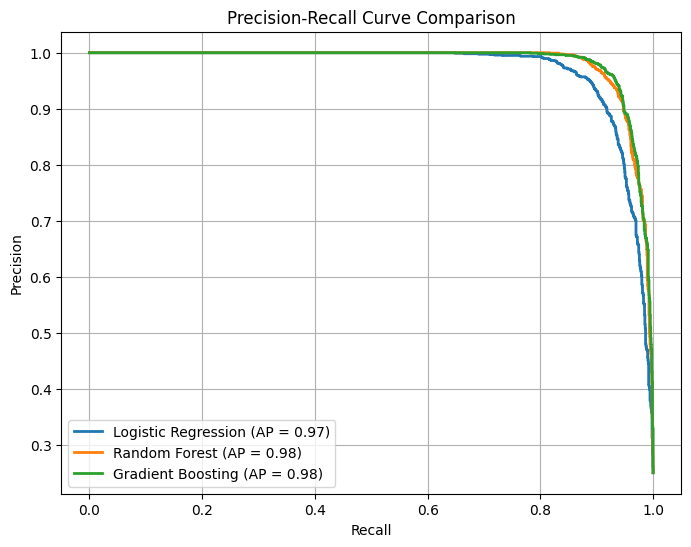

In [211]:
#create a print statement that prints the in and out-of-sample results of the logistic regression, the random forrest and the gradient boosting model
print("\nIn-sample performance:")
print("Logistic Regression:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nRandom Forest:")
print(f"Accuracy: {rf_train_accuracy:.4f}")
print(f"Precision: {rf_train_precision:.4f}")
print(f"F1 Score: {rf_train_f1:.4f}")
print("\nGradient Boosting:")
print(f"Accuracy: {gbm_train_accuracy:.4f}")
print(f"Precision: {gbm_train_precision:.4f}")
print(f"F1 Score: {gbm_train_f1:.4f}")
print("\nOut-of-sample performance:")
print("Logistic Regression:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("\nRandom Forest:")
print(f"Accuracy: {rf_test_accuracy:.4f}")
print(f"Precision: {rf_test_precision:.4f}")
print(f"F1 Score: {rf_test_f1:.4f}")
print("\nGradient Boosting:")
print(f"Accuracy: {gbm_test_accuracy:.4f}")
print(f"Precision: {gbm_test_precision:.4f}")
print(f"F1 Score: {gbm_test_f1:.4f}")
# Plot Precision-Recall curve for all models
plt.figure(figsize=(8, 6))
# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_test)
average_precision_lr = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, lw=2, label=f'Logistic Regression (AP = {average_precision_lr:.2f})')
# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_pred_prob_test)
average_precision_rf = auc(recall_rf, precision_rf)
plt.plot(recall_rf, precision_rf, lw=2, label=f'Random Forest (AP = {average_precision_rf:.2f})')
# Gradient Boosting
precision_gbm, recall_gbm, _ = precision_recall_curve(y_test, gbm_pred_prob_test)
average_precision_gbm = auc(recall_gbm, precision_gbm)
plt.plot(recall_gbm, precision_gbm, lw=2, label=f'Gradient Boosting (AP = {average_precision_gbm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

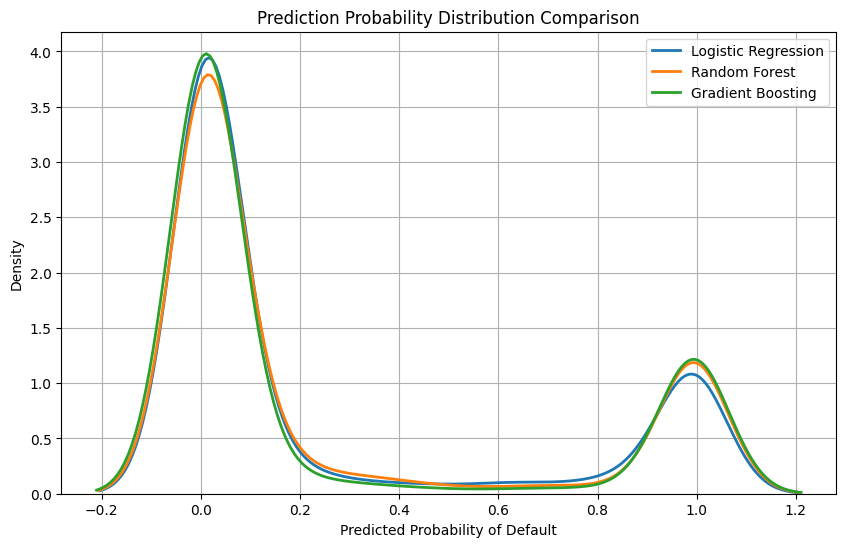

In [212]:
# Plot probability distributions for each model
plt.figure(figsize=(10, 6))

# Get prediction probabilities for each model
lr_probs = logreg.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
gbm_probs = gbm_model.predict_proba(X_test_scaled)[:, 1]

# Create density plots
sns.kdeplot(data=lr_probs, label='Logistic Regression', linewidth=2)
sns.kdeplot(data=rf_probs, label='Random Forest', linewidth=2)
sns.kdeplot(data=gbm_probs, label='Gradient Boosting', linewidth=2)

plt.xlabel('Predicted Probability of Default')
plt.ylabel('Density')
plt.title('Prediction Probability Distribution Comparison')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


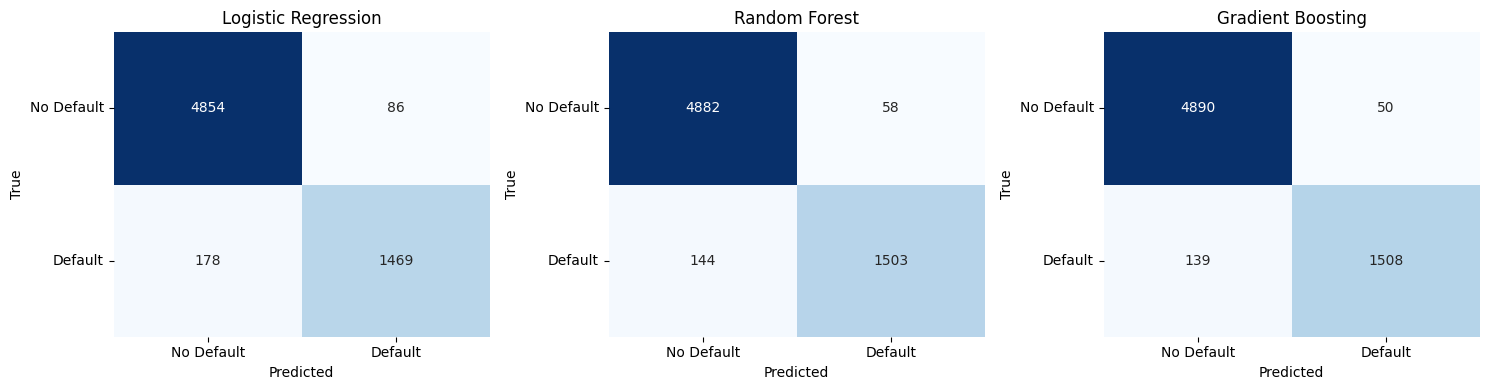

In [213]:
# Create a single figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels(['No Default', 'Default'])
    ax.set_yticklabels(['No Default', 'Default'], rotation=0)

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_test, 'Logistic Regression', ax1)
plot_confusion_matrix(y_test, rf_pred_test, 'Random Forest', ax2)
plot_confusion_matrix(y_test, gbm_pred_test, 'Gradient Boosting', ax3)

plt.tight_layout()
plt.show()


# Conclusion

We've completed a comprehensive analysis of loan default prediction:

1. **Data Cleaning & Preparation**:
   - Handled missing values with appropriate imputation strategies
   - Created a binary default indicator
   - Transformed features and engineered new ones
   - Addressed class imbalance through downsampling

2. **Logistic Regression Analysis**:
   - Identified the most important predictors of default
   - Analyzed odds ratios to understand feature impacts
   - Evaluated model performance with accuracy, precision, and F1 scores
   - Compared in-sample and out-of-sample performance

3. **Machine Learning Model**:
   - Implemented a Random Forest classifier
   - Compared performance metrics between both models
   - Analyzed feature importance from the Random Forest perspective

The analysis provides valuable insights into the factors that contribute to loan defaults and demonstrates how machine learning can improve prediction accuracy compared to traditional statistical methods.